# Chapter 5 - 행렬

# 5.1 행렬이란 무엇인가?

## 5.1.1 전통적인 행렬

- 전통적으로 F상의 행렬은 엔트리들이 F들의 원소들이 2-차원 배열이다.
- 일반적으로, m개 행과 n개 열을 가진 행렬은 m x n 행렬이라 한다.
- 행렬 A에 대해 i,j원소는 i번째 행과 j번째 열에 있는 원소로 정의되며, 전통적으로 $A_{i,j}, A_{ij}$로 나타낸다.

### Quiz 5.1.1
값이 행-리스트들로 구성된 리스트인 중첩된 컴프리헨션을 작성해 보자. 여기서, 행-리스트로 구성된 리스트는 원소가 모두 영인 3x4행렬을 나타낸다.

In [1]:
[[0 for j in range(4)] for i in range(3)]

[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]

### Quiz 5.2.2
값이 열-리스트로 구성된 리스트인 중첩된 컴프리헨션을 작성해 보자. 여기서, 열-리스트로 구성된 리스트는 3x4행렬을 나타내며 이 행렬의 i,j원소는 i-j이다.

In [2]:
[[i-j for i in range(3)] for j in range(4)]

[[0, 1, 2], [-1, 0, 1], [-2, -1, 0], [-3, -2, -1]]

## 5.1.2 행렬에 대해 알아보기

- F상의 D-벡터를 집합 D에서 F로의 함수로 정의하였듯이, F상의 R x C행렬을 카테시안 곱 R x C로의 함수로 정의한다. 
- R의 원소들을 행 라벨(row label)이라 하고 C의 원소들을 열 라벨(column label)이라 한다.

### Example 5.1.3
다음은 R={'a','b'}이고 C={'#','@','?'}인 예이다.

|   |  @ |  # | ?  |
|---|---|---|---|
|  a |1   | 2  | 3  |   
|  b |10   |20   |30   |   

## 5.1.3 행, 열, 엔트리

- 행렬이 유용한 것은 행과 열을 벡터로 해석할 수 있기 때문이다.
- R x C행렬 M($r\in R, c\in C$)에 대해, M의 r,c원소는 (r,c) 쌍이 매핑하는 것으로 정의되며 $M_{r,c}$ 또는 M[r,c]로 나타낸다. 
 - $r\in R$에 대해, 행 r은 각 원소 $c\in C$에 대해 엔트리 c가 M[r,c]인 그러한 C-벡터이다.
 - $c\in C$에 대해, 행 r은 각 원소 $r\in R$에 대해 엔트리 r가 M[r,c]인 그러한 R-벡터이다.

### Quiz 5.1.4 
Vec을 사용하여 열 '?'에 대한 파이썬 표현식을 작성해 보자.

In [3]:
from vec import Vec

Vec({'a','b'}, {'a':3, 'b':30})

Vec({'a', 'b'},{'a': 3, 'b': 30})

### 행들로 구성된 딕셔너리 표현
- 행렬의 각 행은 벡터이므로, Vec의 인스턴스로 표현할 수 있다.
- 이 책에서는 이러한 표현을 rowdict라고 한다.

### 열들로 구성된 딕셔너리 표현
- 행과 열의 쌍대성에 의하면 열-라벨은 Vec의 인스턴스로 표현된 열로 매핑하는 딕셔너리로 표현된다.
- 이 책에서는 이러한 표현을 coldict라고 한다.

### Quiz 5.15
값이 Example 5.1.3의 행렬에 대한 coldict표현인 파있너 표현식을 작성해 보자.

In [4]:
D = {'a','b'}
{'@':Vec(D, {'a':1, 'b':10}),
 '#':Vec(D, {'a':2, 'b':20}),
 '?':Vec(D, {'a':3, 'b':30})}

{'#': Vec({'a', 'b'},{'a': 2, 'b': 20}),
 '?': Vec({'a', 'b'},{'a': 3, 'b': 30}),
 '@': Vec({'a', 'b'},{'a': 1, 'b': 10})}

## 5.1.4 행렬의 파이썬 구현

- 클래스 Mat의 인스턴스는 다음 두 필드를 가질 것이다.
 - 집합들의 쌍(R,C)dㅔ 바인딩될 D(D가 하나의 집합인 Vec과는 다름)
 - 쌍 $(r,c)\in RxC$을 필드 원소에 매핑하는 함수를 나타내는 딕셔너리에 바인딩될 f
- 행렬 표현에도 벡터를 표현할 때 사용한 sparsity표현을 사용한다. 즉, 행령의 엔트리 중 값이 영인 것은 딕셔너리에 표현할 필요가 없다.
- 행렬에서 D의 값은 집합들의 쌍(R,C)이고 딕셔너리의 키들은 카테잇안 곱 R x C의 원소들이다.

In [5]:
from mat import Mat

M=Mat(({'a','b'},{'@','#','?'}), {('a','@'):1, ('a','#'):2, ('a','?'):3,
                                  ('b','@'):10, ('b','#'):20, ('b','?'):30})
print(M)


        #  ?  @
     ----------
 a  |   2  3  1
 b  |  20 30 10



## 5.1.5 단위 행렬

### Definition 5.1.6
유한 집합 D에 대해, D x D 단위행렬은 행-라벨 집학과 열-라벨 집합이 둘다 D이고 모든 $d\in D$에 대해 엔트리 (d,d)는 1(모든 다른 엔트리는 0)인 행렬이다. 단위행렬은 $\mathbb 1_D$로 나타낸다. 보통 집합 D는 문맥상 명확하여 단위행렬을 $\mathbb 1$로 쓴다.

### Quiz 5.1.7
Mat의 인스턴스로 표현되는 {'a','b','c'}x{'a','b','c'}단위행렬에 대한 표현식을 작성해 보자.

In [6]:
M = Mat(({'a','b','c'}, {'a','b','c'}), {('a','a'):1,
                                         ('b','b'):1,
                                         ('c','c'):1})
print(M)


       a b c
     -------
 a  |  1 0 0
 b  |  0 1 0
 c  |  0 0 1



### Quiz 5.1.8
한 줄로 된 프로시저, identity(D)를 작성해 보자. 이 프로시저는 주어진 유한 집합 D에 대해 Mat의 인스턴스로 표현된 D x D 단위행렬을 리턴한다.

In [7]:
def identity(D): return Mat((D,D),{(d,d):1 for d in D})

print(identity({'a','b','c'}))


       a b c
     -------
 a  |  1 0 0
 b  |  0 1 0
 c  |  0 0 1



## 5.1.6 행렬 표현의 변환

- 여러 가지 다른 행렬 표현 방식이 사용될 것이므로 이들 사이의 변환이 가능하면 편리할 것이다.

### Quiz 5.1.9
mat2rowdict(A)를 작성해 보자. 이 프로시저는 주어진 Mat의 인스턴스에 대해 동일한 행렬의 rowdict 표현을 리턴한다.

In [8]:
def mat2rowdict(A): return {r:Vec(A.D[1], {c:A[r,c] for c in A.D[1]}) for r in A.D[0]}

M=Mat(({'a','b'},{'@','#','?'}), {('a','@'):1, ('a','#'):2, ('a','?'):3,
                                  ('b','@'):10, ('b','#'):20, ('b','?'):30})
mat2rowdict(M)

{'a': Vec({'@', '#', '?'},{'@': 1, '#': 2, '?': 3}),
 'b': Vec({'@', '#', '?'},{'@': 10, '#': 20, '?': 30})}

### Quiz 5.1.10
amt2coldict(A)를 작성해 보자. 이 프로시저는 주어진 Mat의 인스턴스에 대해 동일한 행렬의 coldict 표현을 리턴한다.

In [9]:
def mat2coldict(A): return {c:Vec(A.D[0], {r:A[r,c] for r in A.D[0]}) for c in A.D[1]}

mat2coldict(M)

{'#': Vec({'a', 'b'},{'a': 2, 'b': 20}),
 '?': Vec({'a', 'b'},{'a': 3, 'b': 30}),
 '@': Vec({'a', 'b'},{'a': 1, 'b': 10})}

## 5.1.7 matutil.py

- matutil.py 파일 제공
 - identity(D)
 - mat2rowdict(A)
 - mat2coldict(A)
 - rowdict2mat(rowdict)
 - coldict2mat(coldict)
 - listlist2mat(L)

In [10]:
from matutil import *

A = listlist2mat([[10,20,30,40],[50,60,70,80]])
print(A)


        0  1  2  3
     -------------
 0  |  10 20 30 40
 1  |  50 60 70 80



# 5.2 열공간(Column space)과 행공간(Row space)

- 행렬은 여러 가지 목적을 위해 사용되며 그중 한 가지는 벡터들의 묶음을 만드는데 사용된다.

### Definition 5.2.1
행렬 M에 대해
- M의 열공간은 Col M으로 나타내며 M의 열들에 의해 생성되는 벡터공간이다.
- M의 행공간은 Row M으로 나타내며 M의 행들에 의해 생성되는 벡터공간이다.

### Example 5.2.2
$\begin{bmatrix} 1 & 2 & 3 \\ 10 & 20 & 30\end{bmatrix}$
- 열공간: Span{[1,10],[2,20],[3,30]}으로 Span{[1,10]}과 동일하다.
- 행공간: Span{[1,2,3],[10,20,30]}으로 Span{[1,2,3]}과 동일하다.

# 5.3 벡터로서의 행렬

- 행렬은 벡터로 해석될 수 있다는 점에 주목하자.
- 특히, F상의 R x S 행렬은 R x S에서 F로의 함수이다. 
- 따라서 F상의 R x S-벡터로 해석될 수 있다.
- 이 해석을 사용하면 벡터 연산들인 스칼라-벡터 곱셈과 벡터 덧셈을 행렬에 대해 사용할 수 있다.

### Quiz 5.3.1
mat2vec(M)을 작성해 보자.

In [11]:
def mat2vec(M): return Vec({(r,c) for r in M.D[0] for c in M.D[1]}, M.f)

print(mat2vec(M))


 ('a', '#') ('a', '?') ('a', '@') ('b', '#') ('b', '?') ('b', '@')
------------------------------------------------------------------
          2          3          1         20         30         10


# 5.4 전치(Transpose)

- 행렬의 전치는 행과 열을 바꾸는 것을 의미한다.
- 만약 $M^T=M$이면, 행렬 M은 대칭행렬(symmetric matrix)이라 한다.

### Definition 5.4.1
P x Q 행렬의 전치는 $M^T$로 나타내며, 모든 $i\in P, j\in Q$에 대해 $(M^T)_{j,i}=M_{i,j}$를 만족하는 Q x P 행렬이다.

### Quiz 5.4.2 
transpose(M)을 작성해 보자.

In [12]:
def transpose(M): return Mat((M.D[1], M.D[0]), {(c,r):key for (r,c), key in M.f.items()})

print(transpose(M))


       a  b
     ------
 #  |  2 20
 ?  |  3 30
 @  |  1 10



### Example
대칭행렬

In [13]:
M1 = listlist2mat([[1,2],[3,4]])
M2 = listlist2mat([[1,2],[2,4]])
M1_t = transpose(M1)
M2_t = transpose(M2)

print('[[1,2],[3,4]]',M1, M1_t)
print('[[1,2],[2,4]]',M2, M2_t)

[[1,2],[3,4]] 
       0 1
     -----
 0  |  1 2
 1  |  3 4
 
       0 1
     -----
 0  |  1 3
 1  |  2 4

[[1,2],[2,4]] 
       0 1
     -----
 0  |  1 2
 1  |  2 4
 
       0 1
     -----
 0  |  1 2
 1  |  2 4



# 5.5. 선형결합의 행렬-벡터 곱셈과 벡터-행렬 곱셈

- 행렬을 가지고 무엇을 할까? 대부분의 경우 행렬을 벡터와 곱셈한다.
- 행렬을 벡터로 곱하는 방법은 두 가지이다. 행렬-벡터 곱셈과 벡터-행렬 곱셈이다.
- 곱셈의 정의를 선형결합과 도트곱으로 해석할 수 있다.

## 5.5.1 선형결합의 행렬-벡터 곱셈

- 만약 M이 R x C이지만, v는 C-벡터가 아니면, $M*v$는 성립하지 않는다.
- 행렬의 열 수는 벡터의 엔트리 개수와 일치해야 한다.

### Definition 5.5.1(행렬-벡터 곱셈의 선형결합의 정의) 
M을 F상의 R x C 행렬이라 하자. v는 F상의 C-벡터라 하자. 그러면 $M*v$는 선형결합니다.
$$\quad \sum_{c\in C}{v[c](M의 열 c)}$$

### Example 5.5.2
전통적인 행렬을 사용하는 한 예를 고려해 보자.

$\begin{bmatrix} 1 & 2 & 3 \\ 10 & 20 & 30\end{bmatrix} * [7,0,4] = 7[1,10]+0[2,20]+4[3,30]=[19,190]$

### Example 5.5.3
$\begin{bmatrix} 1 & 2 & 3 \\ 10 & 20 & 30\end{bmatrix}$에 벡터 [7,0]을 곱할 수 있을까? 이것은 성립하지 않는다. 2x3행렬에 2-벡터를 곱할 수 없다.

### Example 5.5.4
아래와 같은 행 라벨과 열 라벨을 가지는 행렬에 대한 예를 살펴 보자.

$\begin{bmatrix} & @ & \# & ? \\ a  & 2 & 1 & 3 \\ b & 20 & 10 & 30\end{bmatrix} * \begin{bmatrix} @ & \# & ? \\  0.5 & 5 & -1 \end{bmatrix} = \begin{bmatrix} a & b \\ 3.0  & 30.0 \end{bmatrix} $

### Example 5.5.5
Lights Out 퍼즐에 대한 해는 "버튼 벡터"들의 선형결합이라는 것을 살펴 보았다. 이제, 이러한 선형겹할을 행렬-벡터의 곱으로 표현할 수 있다. 이때, 행렬의 열들이 버튼 벡터들이다.

$[btn1| btn2| btn3|btn4] * [1,0,0,1]$

## 5.5.2 선형결합의 벡터-행렬 곱셈

- 벡터-행렬을 행렬을 구성하는 행들의 선형결합으로 정의할 수 있다.
- 만약 M이 R x C이지만, w가 R-벡터가 아니면, $w*M$는 성립하지 않는다.
- 행렬-벡터 곱셈과 벡터-행렬 곱셈은 다르다.
- 행렬과 벡터 사이의 곱은 교환성이 성립하지 않는다는 사실에 주의해야 한다.

### Example 5.5.7

$[3,4] * \begin{bmatrix} 1 & 2 & 3 \\ 10 & 20 & 30\end{bmatrix} = 3[1,2,3]+4[10,20,30]=[43,86,129]$

### Example 5.5.8
$[3,4,5]* \begin{bmatrix} 1 & 2 & 3 \\ 10 & 20 & 30\end{bmatrix}$은 가능한가? 이것은 성립하지 않는다. 3-벡터와 2x3행렬은 곱할 수 없다

### Remark 5.5.9
행렬의 전치는 행과 열을 바꾼다. M의 행은 $M^T$의 열이다. 그러므로 $w*M$은 $M^T*w$로 정의할 수 있다. 하지만 이런 방식으로 구현하는 것은 바람직하지 않다. 전치는 완전히 새로운 행렬을 생성한다. 만약 행렬이 크면, 벡터-행렬의 곱을 계산하기 위해 이렇게 하는 것은 효율적이지 않다.

### Example 5.5.10
JunkCo 공장의 데이터 표를 기억해 보자.

In [14]:
D = {'metal', 'concrete', 'plastic', 'water', 'electricity'}
v_gnome = Vec(D, {'metal':0, 'concrete':1.3, 'plastic':.2, 'water':.8, 'electricity':.4})
v_hoop = Vec(D, {'metal':0, 'concrete':0, 'plastic':1.5, 'water':.4, 'electricity':.3})
v_slinky = Vec(D, {'metal':.25, 'concrete':0, 'plastic':0, 'water':.2, 'electricity':.7})
v_putty= Vec(D, {'metal':0, 'concrete':0, 'plastic':.3, 'water':.7, 'electricity':.5})
v_shooter = Vec(D, {'metal':.15, 'concrete':0, 'plastic':.5, 'water':.4, 'electricity':.8})

rowdict = {'gnome':v_gnome, 'hoop':v_hoop, 'slinky':v_slinky, 'putty':v_putty, 'shooter':v_shooter}
M = rowdict2mat(rowdict)

R = {'gnome', 'hoop', 'slinky', 'putty', 'shooter'}
u = Vec(R, {'gnome':240, 'hoop':55, 'slinky':150, 'putty':133, 'shooter':90})

print(M)
print(u*M)


             concrete electricity metal plastic water
           ------------------------------------------
   gnome  |       1.3         0.4     0     0.2   0.8
    hoop  |         0         0.3     0     1.5   0.4
   putty  |         0         0.5     0     0.3   0.7
 shooter  |         0         0.8  0.15     0.5   0.4
  slinky  |         0         0.7  0.25       0   0.2


 concrete electricity metal plastic water
-----------------------------------------
      312         356    51     215   373


## 5.5.3 주어진 벡터의 선형결합 표현을 행렬-벡터 곱셈으로 구성하기

- 선형결합은 행렬-벡터 또는 벡터-행렬 곱으로 표현될 수 있다는 것을 살펴 보았다. 이제, 이 개념을 사용하여 주어진 벡터를 선형결합으로 표현하는 문제를 다시 구성해 보자.

### Example 5.5.11
섹션 4.1.4의 산업 스파이 문제를 기억해 보자. b를 소비된 리소스들의 벡터라 하자. x는 벡터 변수라고 정의하자. (5.1.10)을 고려하여 다음의 벡터-행렬 방정식을 얻는다. 
$$x*M=b$$
산업 스파이 문제를 푸는 것은 위 방정식을 푸는 것과 같다.

### Example 5.5.12
Lights Out 퍼즐은 s를 버튼 벡터들의(GF(2)상의)의 선형결합으로 표현할 수 있고 행렬-벡터 곱 $B*x$로 쓸수 있다. 여기서 B는 행렬이며 이 행렬의 열들은 버튼 벡터들이다. 따라서 올바른 계수들을 찾는 문제는 $B*x=s$를 만족하는 그러한 벡터 x를 찾는 문제로 표현할 수 있다.

In [15]:
from GF2 import one

def button_vectors(n):
    D={(i,j) for i in range(n) for j in range(n)}
    vecdict={(i,j):Vec(D, dict([((x,j), one) for x in range(max(i-1, 0), min(i+2, n))] +
                               [((i,y), one) for y in range(max(j-1, 0), min(j+2, n))])) 
             for i,j in D}
    return vecdict

B = coldict2mat(button_vectors(5))
s = Vec(B.D[0], {(2,2):one})

print(B)
print(s)
print('Problem: B*x=s')


            (0, 0) (0, 1) (0, 2) (0, 3) (0, 4) (1, 0) (1, 1) (1, 2) (1, 3) (1, 4) (2, 0) (2, 1) (2, 2) (2, 3) (2, 4) (3, 0) (3, 1) (3, 2) (3, 3) (3, 4) (4, 0) (4, 1) (4, 2) (4, 3) (4, 4)
          --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 (0, 0)  |     one    one      0      0      0    one      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0
 (0, 1)  |     one    one    one      0      0      0    one      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0
 (0, 2)  |       0    one    one    one      0      0      0    one      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0      0
 (0, 3)  |       0      0    one    one    one      0      0    

## 5.5.4 행렬-벡터 방정식의 해 구하기

### Computational Problem 5.5.13 행렬-벡터 방정식의 해 구하기
- input: R x C행렬 A와 R-벡터 b
- output: $A*\hat x=b$를 만족하는 C-벡터 $\hat x$

위의 계산을 푸는 알고리즘은 $x*A=b$ 문제에서도 %A^T$를 사용하여 풀수 있다.

### Example 5.5.14
Example 4.4.13에서 Span{[a,b],[c,d]}을 고려하였다. 이때, $a,b,c,d \in \mathbb R$이다.
1. 만약 [c,d]가 Span{[a,b]}에 있지 않으면 $ad\neq cd$이고, Span{[a,b],[c,d]}는 $\mathbb R^2$이다.
2. 이 경우, $\mathbb R^2$의 모든 벡터 [p,q]에 대해 다음을 만족하는 계수 $\alpha, \beta$가 있다.
$$[p,q]=\alpha[a,b]+\beta[c,d]$$

위의 식은 행렬-벡터 방정식으로 쓸 수 있다.

$\begin{bmatrix} a & c \\ b & d \end{bmatrix} * [\alpha,\beta] =[p,q]$

$\alpha, \beta$는 정의에 의해서 아래와 같이 주어진다.
- $\alpha=\frac{dq-cq}{ad-bc}, \beta=\frac{aq-bq}{ad-bc}$

따라서 행렬 2x2에 대한 행렬-벡터 방정식을 푸는 알고리즘이 제공한다.

예를 들어, 행렬방정식 $\begin{bmatrix} 1 & 2 \\ 3 & 4 \end{bmatrix} * [\alpha,\beta] =[-1,1]$을 풀기 위해,
$\alpha=\frac{4*-1-2*1}{1*4-2*3}=3, \beta=\frac{1*-1-3*1}{1*4-2*3}=-2$로 설정한다.

___
이러한 계산 문제를 위한 알고리즘은 나중에 다루게 될 것이다. 지금은 이러한 알고리즘들을 구현한 solver 모듈을 제공한다.
- input: Mat의 인스턴스 A와 Vec의 인스턴스 v
- output: 임의의 벡터 u가 있을 경우 Au=v를 만족하는 벡터 u(어떤 허용 에러 내에서)

### Example 5.5.15
solver(A,b)를 사용하여 산업 스파이 문제를 풀어보자.

In [16]:
from solver import solve

D = {'metal', 'concrete', 'plastic', 'water', 'electricity'}
v_gnome = Vec(D, {'metal':0, 'concrete':1.3, 'plastic':.2, 'water':.8, 'electricity':.4})
v_hoop = Vec(D, {'metal':0, 'concrete':0, 'plastic':1.5, 'water':.4, 'electricity':.3})
v_slinky = Vec(D, {'metal':.25, 'concrete':0, 'plastic':0, 'water':.2, 'electricity':.7})
v_putty= Vec(D, {'metal':0, 'concrete':0, 'plastic':.3, 'water':.7, 'electricity':.5})
v_shooter = Vec(D, {'metal':.15, 'concrete':0, 'plastic':.5, 'water':.4, 'electricity':.8})

rowdict = {'gnome':v_gnome, 'hoop':v_hoop, 'slinky':v_slinky, 'putty':v_putty, 'shooter':v_shooter}

M = rowdict2mat(rowdict)
C = {'metal', 'concrete', 'plastic', 'water', 'electricity'}
b = Vec(C, {'metal':51.0, 'concrete':312.0, 'plastic':215.4, 'water':373.1, 'electricity':356.0})

solution = solve(M.transpose(), b)
print(M.transpose())
print(solution)


                 gnome hoop putty shooter slinky
               ---------------------------------
    concrete  |    1.3    0     0       0      0
 electricity  |    0.4  0.3   0.5     0.8    0.7
       metal  |      0    0     0    0.15   0.25
     plastic  |    0.2  1.5   0.3     0.5      0
       water  |    0.8  0.4   0.7     0.4    0.2


 gnome hoop putty shooter slinky
--------------------------------
   240   55   133      90    150


이 벡터는 방정식을 푸는가? 이것은 잉여 벡터(residual vector)(흔히 residual이라고 불림)을 계산함으로써 테스트할 수 있다. 만약 해가 정확하다면, 잉여 벡터는 영벡터이다. 잉여 벡터가 거의 영벡터인지 알아보는 쉬운 방법은 벡커 엔트리들의 제곱의 합을 계산하는 것이다. 엔트리들의 제곱의 합은 엔트리들 자시의 도트곱이다.

In [17]:
residual = b - solution*M
print(residual)
print('\nredisual*residual:', residual*residual)


 concrete electricity     metal  plastic     water
--------------------------------------------------
 5.68E-14    2.27E-13 -3.55E-13 2.84E-14 -3.41E-13

redisual*residual: 2.982777745949272e-25


계산한 해는 방정식에 대한 유일한 해가 아닐 수 있다. 이 주제에 대해서는 나중에 좀 더 살펴볼 것이다.

### Example 5.5.16
5x5 Lights Out 퍼즐을 풀어보자.

In [18]:
B = coldict2mat(button_vectors(5))
s = Vec(B.D[0], {(2,2):one})

sol = solve(B,s)

print(B*sol==s)
print([(i,j) for i in range(5) for j in range(5) if sol[i,j]==one])

True
[(0, 1), (0, 2), (0, 4), (1, 0), (1, 4), (2, 0), (2, 2), (2, 3), (3, 2), (4, 0), (4, 1)]


# 5.6 도트곱의 행렬-벡터 곱셈

## 5.6.1 정의

### Definition 5.6.1 (행렬-벡터 곱샘의 도트곱 정의)
만약 M이 R x C 행렬이고 u는 C-벡터이면, $M*u$는 R-벡터 v이다. 이때, v[r]은 M의 행 r과 u의 도트곱이다.

### Example 5.6.2
$\begin{bmatrix} 1 & 2 \\ 3 & 4 \\ 10 * 0\end{bmatrix} * [3,-1]$ 곱셈은 3-벡터이다. 첫 번째 엔트리는 첫 번째 행과 벡터의 도트곱이며, 두 번째 엔트리는 두 번째 행과 벡터의 곱이고, 세 번째 엔트리는 세 번째 행과 벡터의 곱이다. 따라서 위 곱은 [1,5,30]이다.

### Definition 5.6.3 (벡터-행렬 곱샘의 도트곱 정의)
만약 M이 R x C 행렬이고 u는 R-벡터이면, $u*M$는 C-벡터 v이다. 이때, v[c]은 u와 M의 c의 도트곱이다.

## 5.6.1 응용 예

### Example 5.6.4
이미지 다운샘플링(downsample)하고자 한다고 해 보자. 

고해상도 이미지를 벡터 u로 나타내 보자. 평균은 도트곱으로 나타낼 수 있다. 각 행이 u와 도트곱이 되는 벡터인 행렬 M을 구성할 수 있다. M의 열-라벨들은 고해상도 이미지듸 픽셀들의 좌표이다. M의 행-라벨들은 저해상도 이미지의 팩셀들의 좌표이다. 아래 코드는 예제이지만 이러한 형태의 행렬을 실제로 생성하고자 하는 사람은 없을 것이다.! 이 코드는 단지 예로 보여주기 위한 것일 뿐이다.

In [19]:
D_high = {(i,j) for i in range(3000) for j in range(2000)}
D_low = {(i,j) for i in range(750) for j in range(500)}
M = Mat((D_low, D_high), {((i,j),(4*i+m,4*j+n)):1/16 for m in range(4) for n in range(4) 
                          for i in range(750) for j in range(500)})

### Example 5.6.5
이미지와 주어진 특정 영역을 희미하게 만든 이미지를 생성하고자 한다.

희미하게 처리하해야 할 픽셀에 대한 픽셀값은 여러 주변 픽셀값들이 평균으로 계산된다. 여기서도 평균은 도트곱으로 계산될 수 있으며 행렬-벡터 곱셈은 행렭의 각 행에 대해 하나씩 도트곱을 수행하는 것으로 해석될 수 있음을 이용한다.

블러링(blurring)할 때 단순한 평균을 사용하든 가중치 기반 평균을 사용하든 변환은 섹션 3.9.3에서 언급한 선형 필터(linear filter)dlek.

### Example 5.6.6
어떤 오디오 세그머트 내에서 오디오 클립을 찾는 것은 그 오디오 클립이 위치할 수 있는 가능한 각 위치에 대해 하나씩 여러 개의 도트곱을 찾는 것으로 나타낼 수 있다. 이러한 도트곱을 찾는 것은 행렬-벡터 곱셈으로 표현하는 것이 편리하다.

짧은 시퀀스[0,1,-1]을 어떤 긴 시퀀스 [0,0,-1,2,3,-1,0,-1,-1] 내에서 찾고자 한다.

이중 마지막 두 위치는 짧은 시퀀스는 랩어라운드(wrap-around)를 적용하면 짧은 시퀀스를 긴 시퀀스의 마지막에서 시작하여 처음으로 랩어라운드하여 찾는다.

10개의 도트곱을 계산하는 것은 10개의 행을 가진 행렬과 10-원소의 긴 시퀀스와 곱하는 것으로 표현된다.

$\begin{bmatrix} 0 & 1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0\\ 0 & 0 & 1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 \\ ... \\ 1 & -1 & 0 & 0 & 0 & 0 & 0 & 0 & 0 & 0\end{bmatrix} * [0,0,-1,2,3,01,0,-1,-1]=[1,-3,-1,4,-1,-1,2,0,-1,0]$ 

비록 도트곱이 가장 큰 값은 5이지만 이것은 최고 매칭위치는 2에 해당하는 위치이다.

랩어라운드를 적용하는 이유는 무엇인가? 이ㅠ는 가능해 보이는 것보다 훨씬 빠르게 행렬-벡터 곱을 계산할 수 있는 그런 알고리즘을 사용할 수 있기 때문이다.

## 5.6.3 선형방정식들의 시스템을 행렬-벡터 방정식으로 구성하기

- 선형 방정식들이 시스템은 $a_i\cdot x=\beta_i$의 컬렉션으로 정의하였다.
- 이러한 방정식들의 시스템을 하나의 행렬-벡터 방정식으로 쓸 수 있다.
- A를 행들이 $a_i$인 행렬이라 하자. b는 벡터 $\beta_i$라 하자.
- 그러면, 선형방정식들의 시스템은 행렬-벡터 방정식 $A*x=b$와 동일하다.

### Example 5.6.7
Example 3.9.7에서는 센서 노드들의 하드웨어 구성 요소들에 대한 전류 소모를 계산하는 것이었다.

In [20]:
D = {'radio', 'sensor', 'memory', 'CPU'}

v0 = Vec(D, {'radio':.1, 'CPU':.3})
v1 = Vec(D, {'sensor':.2, 'CPU':.4})
v2 = Vec(D, {'memory':.3, 'CPU':.1})
v3 = Vec(D, {'memory':.5, 'CPU':.4})
v4 = Vec(D, {'radio':.2, 'CPU':.5})

b = Vec({0,1,2,3,4}, {0:140.0, 1:170.0, 2:60.0, 3:170.0, 4:250.0})

A = rowdict2mat([v0,v1,v2,v3,v4])

rate = solve(A, b)
print(rate)


 CPU memory radio sensor
------------------------
 300    100   500    250


___
선형방정식들이 연관된 문제와 방정식은 행렬-벡터 방정식들이 포함된 문제로 다시 표현할 수 있다.
- 선형시스템의 해를 구하는 것은행렬방정식의 해를 구하는 것이 된다.
- GF(2)상의 선형시스템에 대해 얼마나 많은 해가 있는지에 대한 질문은 GF(2)상의 행렬-벡터 방정식에 대한 해가 얼마나 많은지에 대해 질문이 된다.
- GF(2)상의 선형시스템에 대한 모든 해를 계산하는 것은 GF(2)상의 행렬-벡터 방정식에 대한 모든 해를 계산하는 것ㅇ디ㅏ.

## 5.6.4 삼각시스템(triangular system)과 삼각행렬(triangular matrix)
- 영이 아닌 엔트리들이 삼각형을 형성하는 행렬을 삼각행렬이라 한다.

### Example 5.6.8
Example 3.11.1의 삼각시스템을 행렬-벡터 방정식으로 다시 표현하면 다음과 같다.
$\begin{bmatrix} 1 & 0.5 & -2 & 4 \\ 0 & 3 & 3 & 2 \\ 0 & 0 & 1 & 5 \\ 0 & 0 & 0 & 2 \end{bmatrix} * x=[-8,3,-4,6]$ 

### Definition 5.6.9
n x n 상삼각(upper-triangular)행렬 A는 i>j에 대해 $A_{ij}=0$인 행렬이다.

### Definition 5.6.10
R과 C를 유한 집합이라 하자. $L_R$은 R의 원소들로 구성된 리스트이고 $L_C$는 C의 원소들로 구성된 리스트라 하자. R x C행렬 A는 i>j에 대해 다음 조건이 만족되면 $L_R$과 $L_C$에 대한 삼각행렬이다.

$\quad A[L_R[i],L_C[j]]=0$

### Example 5.6.11
{a,b,c}x{@,#,?} 행렬이 상삼각행렬임을 확인해 보자

In [21]:
A = Mat(({'a','b','c'},{'@','#','?'}),
        {('a','#'):2, ('a','?'):3,
        ('b','@'):10, ('b','#'):20, ('b','?'):30,
        ('c','#'):35})
print(A)
print(A.pp(['b','a','c'], ['@','?','#']))


        #  ?  @
     ----------
 a  |   2  3  0
 b  |  20 30 10
 c  |  35  0  0


        @  ?  #
     ----------
 b  |  10 30 20
 a  |   0  3  2
 c  |   0  0 35

None


### Problem 5.6.12
(그래프 알고리즘에 대한 지식이 있는 학생을 위함) 주어진 행렬에 대해 상삼각 행렬이 되는 리스트를 디자인해 보자. 또는 그러한 리스트가 존재하지 않는다고 리포하자.

## 5.6.5 행렬-벡터 곱셈의 산줄적 성질

### Proposition 5.6.13
M을 R x C 행렬이라 하자.
- 임의의 C-벡터 v와 임의의 스칼라 $\alpha$에 대해,
$$M*(\alpha v)=\alpha (M*v)$$
- 임의의 C-벡터 u, v에 대해,
$$M*(u+v)=M*u+M*v$$

### Problem 5.6.14 
5.6.13의 두 번째 식을 증명해 보자.

- 좌변의 엔트리 r은 M의 행 r과 (u+v)의 도트곱과 같고,
- 우변의 엔트리 r은 M의 행 r과 u의 도트곱과 v의 도트곱의 덧셈과 같다.

Proposition 3.9.25 벡터 덧셈에 대한 도트곱의 분배성에 의해 좌변과 우변의 엔트리를 동일하다.

# 5.7 영공간(Null Space)

## 5.7.1 동차 선형시스템과 행렬방정식

### Definition 5.7.1
행렬 A의 영공간은 집합 $\{v:A*v=0\}$이다. 이것은 Null A로 나타낸다.

### Example 5.7.2
A = $\begin{bmatrix} 1 & 2 & 3 \\ 4 & 5 & 6 \\ 5 & 7 & 9 \end{bmatrix}$이라 하자. $A*[1,1,-1]$은 영벡터이다. 따라서 [1,1,-1]은 Null A에 속한다. 임의의 스칼라 $\alpha$에 대해 $A*(\alpha [1,1,-1])$도 영벡터이고 Null A에 속한다.

### Problem 5.7.3
주어진 각 행렬에 대해, 행렬의 영공간에 있는 영이 아닌 벡터를 찾아라.

1. [1 0 1]: [1 0 -1]
2. $\begin{bmatrix} 2 & 0 & 0 \\ 0 & 1 & 1\end{bmatrix}$: [0 1 -1]
3. $\begin{bmatrix} 1 & 0 & 0 \\ 0 & 0 & 0 \\ 0 & 0 & 1 \end{bmatrix}$: [0 1 0]

### Lemma 5.7.4
임의의 R x C 행렬 A와 C-벡터 v에 대해 벡터 z가 A의 영공간에 있을 필요 충분 조건은 $A*(v+z)=A*v$이다.

## 5.7.2 행렬-벡터 방정식의 해공간

### Corollary 5.7.5
$u_1$은 행렬-벡터 방정식 A*x=b의 해라고 해 보자. 그러면, $u_2$도 또한 해가 될 필요충분조건은 $u_1-u_2$가 A의 영공간에 속하는 것이다.

### Corollary 5.7.6
행렬-벡터 방정식 Ax=b가 해를 가진다고 해 보자. 이 해가 유일한 해가 될 필요충분조건은 A의 영공간이 영벡터로만 구성되는 것이다.

### Question 5.7.7
해의 유일성 - 행렬의 영공간이 영벡터로만 구성되는지 어떻게 알 수 있는가?

### Question 5.7.8
GF(2)상의 행렬의 영공간에 대한 크기(cardinality)를 어떻게 찾는가?

## 5.7.3 에러정정코드에 대한 소개

- 복제(replication): 비트열을 홀수로 복제해서 사용한다. 만약 비트열을 세 번씩 작성하면 된다. 즉 각 비트 위치에 대해 세 비트열에 나타나는 비트가 다르면 두 번 나타나는 비트를 선택한다. 하지만 이 방법은 필요 이상으로 많은 비트를 사용하게 된다.
- 해밍코드(Hamming code)=선형 이진 블럭 코드(linear binary block code)
 - 선형이라 하는 이유는 코드가 선형대수에 기반을 두고 있기 때문이다.
 - 이진이라 하는 이유는 코드가 입력과 출력이 이진수이기 때문이다.
 - 블럭이라 하는 이유는 코드가 고정길이의 비트 시퀀스에 관련되기 때문이다.
 - 데이터의 전송과 저장은 잡음 채널(noisy channel)에 의해 모델링되는데, 잡음 채널에서는 데이터의 비트가 때때로 반대로 뒤바뀐다.
 - 함수 $f:GF(2)^m\rightarrow GF(2)^n$, 해밍코드에서 m은 4이고 n은 7이다.
 - 인코딩된 집합, 즉 f의 상을 C로 나타내 보자. C의 벡터들은 코드워드(codewords)라고 한다.

## 5.7.4 선형코드

- c는 채널로 전송한 코드워드라 하고 $\hat c$은 채널은 통해 수신된 벡터라하자.
- e는 에러가 발생한 위치의 값이 1인 벡터이다. e를 에러벡터라고 한다.

$\quad \hat c=c+e$

- 선형코드에서 코드워드의 집합 C는 행렬 H의 영공간이다.

$\quad H*\hat c=H*(c+e)=H*c+H*e=0+H*e=H*e$

- 벡터 H*e는 에러 신드롬(error syndorme)이라 한다. 만약 에러 신드롬이 영벡터이면 에러가 발생하지 않는 경우이고, 영벡터가 아니면 에러가 발생한 경우이다.

## 5.7.5 해밍코드

- 해밍코드에서 코드워들은 7-벡터들이다.

$H = \begin{bmatrix} 0 & 0 & 0 & 1 & 1 & 1 & 1 \\ 0 & 1 & 1 & 0 & 0 & 1 & 1 \\ 1 & 0 & 1 & 0 & 1 & 0 & 1 \end{bmatrix}$

### Example 5.7.9
e는 세 번째 위치에 1을 가지며 e=[0,0,1,0,0,0,0]이라 해 보자. 그러면 H*e는 H의 세 번째 열이고 그 값은 [0,1,1]이다.

In [22]:
from vecutil import *
H = listlist2mat([[0, 0, 0, one, one, one, one], [0, one, one, 0, 0, one, one], [one, 0, one, 0, one, 0, one]])
e = list2vec([0, 0, one, 0, 0, 0, 0])
print(H*e)


 0   1   2
----------
 0 one one


### Quiz 5.7.10
H*e는 [1,1,0]이라고 해 보자. 이 경우, e는 무엇인가?

In [23]:
e = list2vec([0, 0, 0, 0, 0, one, 0])
print(H*e)


   0   1 2
----------
 one one 0


### Quiz 5.7.11
해밍코드는 2비트 에러를 교정할 수 없을 보여주자. 즉, 두 개의 서로 다른 벡터 $e_1, e_2$에 대해 각 벡터는 많아야 두 개의 1을 가지며 $H*e_1=H*e_2$인 그러한 두 벡터 $e_1,e_2$를 보여주면 된다.

In [24]:
e1 = list2vec([one, one, 0, 0, 0, 0, 0])
e2 = list2vec([0, 0, one, 0, 0, 0, 0])

print(H*e1, '\n', H*e2)


 0   1   2
----------
 0 one one 
 
 0   1   2
----------
 0 one one


### Example 5.7.12
해밍코드는 에러의 수가 1개 이하인 경우에만 에러를 검출할 수 있다.

e=[0,0,1,0,0,0,1]이라 해 보자. 그러면, H*e=[0,1,1]+[1,1,1]=[1,0,0]이다. 즉 에러 비트가 1개라고 해석될 수 있다.

In [25]:
e = list2vec([0,0,one,0,0,0,one])
print(H*e)


   0 1 2
--------
 one 0 0


# 5.8 스파스(Sparse) 행렬-벡터 곱 계산

### Definition 5.8.1 (행렬-벡터 곱셈의 일반적 정의)
만약 M이 R x C행렬이고 u가 C-벡터이면, M*u는 각 $r\in R$에 대해 다음을 만족하는 R-벡터 v이다.
$$v[r]=\sum_{c\in C}{M[r,c]u[c]}$$

___
M의 스파스 표현 고려
 1. initialize v to zero
 2. for each pair(i,j) such that sparse representation specifies M[i,j],
 3.  v[i]=v[i]+M[i,j]

### Remark 5.8.2
이 알고리즘은 벡터의 sparsity를 이용하려고 하지 않는다. 행렬-벡터 또는 벡터-행렬 곱셈을 수행할 때 벡터의 sparsity를 이용하려고 하는 것은 일반적으로 그럴만한 가치가 없다.

### Remark 5.8.3
출력 벡터에 영들이 있을 수 있지만 이러한 영들은 '우연'이라고 간주하고 흔하지 않는 경우이므로 이러한 경우를 찾으려고 노력할만한 가치는 없다.

# 5.9 행렬과 함수의 만남

## 5.9.1 행렬에서 함수로

모든 행렬 M에 대해 행렬-벡터 곱셈을 사용하여 함수 $x\rightarrow M*x$를 정의할 수 있다.
- 이 섹션에서는 편의상 $f_M$이라 할 것이다.
- 공식적으로 정의하면, 만약 M이 필드 F상의 R x C 행렬이면, 함수 $f_M:F^C\rightarrow F^R은 f_M(x)=M*x$이다.
- 이것은 선형 대수학에서 사용되는 전통적인 정의는 아니다. 여기서 이것을 사용하는 것은 교육적 목적을 위해서이다.

### Example 5.9.1:
M은 행렬 $\begin{bmatrix} & @ & \# & ? \\ a  & 2 & 1 & 3 \\ b & 20 & 10 & 30\end{bmatrix}$이라고 하자. 그러면, 함수 $f_M$의 정의역은 $R^{\{\#,@,?\}}$, 공역은 $R^{\{a,b\}}$이다. 예를 들어, 벡터 $\begin{bmatrix} @ & \# & ? \\ 2  & 2 & -2\end{bmatrix}$의 치역은 $\begin{bmatrix} a & b \\ 0  & 0 \end{bmatrix}$이다.

### Problem 5.9.2
$M^T$는 M의 전치행렬이다. $M^T$에 대응하는 함수는 $f_{M^T}$이다.
1. $f_{M^T}$의 정의역은 무엇인가?
2. 공역은 무엇인가?
3. 치역이 모두 영벡터인 $f_{M^T}$의 정의역에 있는 한 벡터를 제시해 보자.

답변)
1. $F^R$
2. $F^C$
3. example 5.9.1에서 한 예는 [10,-1]이다.

## 5.9.2 함수에서 행렬로

어떤 모르는 행렬 M에 대응하는 함수 $f_M:F^A\rightarrow F^B$가 있다고 해 보자. $f_M(x)=M*x$인 행렬 M을 계산하고자 한다.
1. M의 열-라벨 집합은 A가 되어야 한다.
2. M의 행-라벨 집합은 B가 되어야 한다.
3. M은 B x A 행렬이다.
4. 행렬-벡터 곱의 선형결합 정의를 사용한다.
 - $F^A$에 표준 생성자를 기억해 보자. 각 원소 $a\in A$에 대해 a는 1에 매핑하고 A의 다른 모든 원소는 0에 매핑하는 생성자 $e_a$가 있다.
 - 선형결합 정의에 의하면 $M*e_a$는 M의 a열이다.
 - 이것은 M의 열 a는 $f_M(e_a)$와 동일해야 함을 보여준다.
 - $M[:a]=f_M(e_a)$

## 5.9.3 행렬을 유도하는 예

### Example 5.9.3
$s(\cdot)$는 x좌표를 2만큼 스케링하는 $R^2$에서 $R^2$로의 함수라고 하자. 어떤 행렬 M에 대해 $s([x,y])=M*[x,y]$라고 가정하자.
1. 표준생정자 [1,0]에 대해서, $[1,0]\rightarrow [2,0]$
2. 표준생정자 [0,1]에 대해서, $[0,1]\rightarrow [0,1]$
3. 따라서 $M=\begin{bmatrix} 2 & 0 \\ 0  & 1 \end{bmatrix}$이다.

### Example 5.9.4
$r_{90}(\cdot)$은 $R^2$에서 $R^2$로의 함수라고 하자. 이 함수는 2D상의 점들을 원점에 대해 반시계 방향으로 90도 회전하는 것이다. 어떤 행렬 M에 대해 $s([x,y])=M*[x,y]$라고 가정하자.
1. 표준생정자 [1,0]에 대해서, $[1,0]\rightarrow [0,1]$
2. 표준생정자 [0,1]에 대해서, $[0,1]\rightarrow [-1,0]$
3. 따라서 $M=\begin{bmatrix} 0 & -1 \\ 1  & 0 \end{bmatrix}$이다.

### Example 5.9.5
$r_\theta(\cdot)$은 $R^2$에서 $R^2$로의 함수라고 하자. 이 함수는 2D상의 점들을 원점에 대해 반시계 방향으로 $\theta$로 회전하는 것이다. 어떤 행렬 M에 대해 $s([x,y])=M*[x,y]$라고 가정하자.
1. 표준생정자 [1,0]에 대해서, $[1,0]\rightarrow [cos\theta,sin\theta]$
2. 표준생정자 [0,1]에 대해서, $[0,1]\rightarrow [-sin\theta,cos\theta]$
3. 따라서 $M=\begin{bmatrix} cos\theta & -sin\theta \\ sin\theta  & cos\theta \end{bmatrix}$이다.
___
복소수의 경우 어떤 각도만큼 회전하는 것은 단순히 곱셈하는 것이다. $z^{'}=ze^{\theta i}$

### Example 5.9.6
$t(\cdot)$은 $R^2$에서 $R^2$로의 함수라고 하자. 이 함수는 2D상의 점들을 1유닛 오른쪽으로 그리고 2유닛 위쪽으로 평행이동한다. 어떤 행렬 M에 대해 $s([x,y])=M*[x,y]$라고 가정하자.
1. 표준생정자 [1,0]에 대해서, $[1,0]\rightarrow [2,2]$
2. 표준생정자 [0,1]에 대해서, $[0,1]\rightarrow [1,3]$
3. 따라서 $M=\begin{bmatrix} 2 & 1 \\ 2  & 3 \end{bmatrix}$이다.
___
실제로는 어떤 행렬 M에 대해 $s([x,y])=M*[x,y]$라고 가정이 잘못 되었다.

# 5.10 선형함수

- 함수가 행렬-벡터 곰셉으로 표현될 수 있는지는 어떻게 알 수 있을까?

## 5.10.1 행렬-벡터 곱으로 표현될 수 있는 함수

- 섹션 5.6.5에서 행렬-벡터 곱셈의 두 가지 대수적 성질을 증명하였꼬, 이러한 대수적 성질을 사용하여 특수한 종류의 함수인 *선형함수*를 정의한다.

## 5.10.2 정의와 간단한 예제

### Definition 5.10.1
U와 V는 필드 F상의 벡터공간이라 하자. 함수 $f:U\rightarrow V$는 다음 두 성질을 만족할 경우 선형함수라 한다.
- Property L1: f의 정의역 내 임의의 벡터 u와 F내 임의의 스칼라 $\alpha$에 대해,
$$f(\alpha u)=\alpha f(u)$$
- Peroperty L2: f의 정의역 내 임의의 벡터 u와 v에 대해,
$$f(u+v)=f(u)+f(v)$$

(선형함수란 말은 선형변환이란 말과 같다)

### Proposition 5.10.2
임의의 행렬 M에 대해 함수 $x\mapsto M*x$는 선형함수이다.

### Lema 5.10.3
F상의 임의의 C-벡터 a에 대해, $f(x)=a\cdot x$에 의해 정의돈 함수 $f:F^C\rightarrow F$는 선형함수이다.

### 도트곱의 이중 선형성(Bilinearity)
Lema 5.10.3에 의하면, 임의의 벡터 w에 대해, 함수 $x \mapsto w\cdot x$는 x의 선형함수이다. 따라서 도트곱 함수 $f(x,y)=x\cdot y$는 첫 번째 인수에 대해 선형이다(즉, 두 번째 인수로서 벡터를 적용한다면). 도트곱의 대칭에 의해(Proposition 3.9.21), 도트곱 함수는 또한 두 번째 인수에 대해 선형이다. 도트곱 함수가 이중 선형이라는 것은 이 함수가 각 인수에 대해 선형이라는 것을 의미한다.

### Example 5.10.4
F를 임의의 필드라 하자. $(x,y)\mapsto x+y$에 정의되는 $F^2$에서 $F$로의 함수는 선형함수이다. 이것은 도트곱의 이중 선형성을 사용하여 증명할 수 있다.

### Quiz 5.10.5
정의역 $\mathbb R^2$를 가지며 $[x,y]\mapsto xy$에 의해 정의되는 함수는 선형함수가 아님을 보여주자.

Answer) 

$ f([1,1]+[1,1]) = f([2,2]) = 4 $

$ f([1,1]+f([1,1]) = 1+1 = 2$

즉, L2조건에 위배된다.

### Quiz 5.10.6
90도 회전 $r_{90}(\cdot)$은 선형함수임을 보여라.

Answer)

$L1: \alpha f([x,y]) = \alpha[-y,x] = [-\alpha y,\alpha x] = f([\alpha x, \alpha y]) = f(\alpha [x,y])$

$L2: f([x_1,y_1])+f([x_2,y_2])=[-y_1,x_1]+[-y_2,x_2]=[-y_1-y_2,x_1+x_2]=f([x_1+x_2,y_1+y_2])$

### Exercise 5.10.7
$g:\mathbb R^2 \rightarrow \mathbb R^3을 g([x,y])=[x,y,1]$로 정의해 보자. g는 선형함수인가?

Answer)

$L2: g([x_1,y_1])+g([x_2,y_2]) = [x_1,y_1,1]+[x_2,y_2,1]=[x_1+x_2,y_1+y_2,2]$

$\quad g([x_1, y_1]+[x_2,y_2]) = [x_1+x_2,y_1+y_2,1]$

즉, L2에 위배된다.

### Exercise 5.10.8
$h:\mathbb R^2 \rightarrow \mathbb R^2$는 y축에 대한 반사(reflection)를 나타내는 함수라 정의해 보자. 이 함수는 선형인가?

Answer)

$h([x,y]) = [x,-y]$

$L1: \alpha h([x,y]) = [\alpha x, -\alpha y] = f([\alpha x, \alpha y]) = f(\alpha [x,y])$
$L2: h([x_1,y_1])+h([x_2,y_2]) = [x_1,-y_1]+[x_2,-y_2]=[x_1+x_2,-y_1-y_2] = f([x_1+x2,y_1+y_2]) = f([x_1,y_1]+[x_2,y_2])$

### Exercise 5.10.9
섹션 5.9.3에서 다룬 예들 중 적어도 하나의 경우 함수를 $f(x)=M*x$로 나타낼 수 없다. Properties L1,L2를 만족하지 않는다는 것을 보여주자.

Answer)
Example 5.9.6의 평행이동(1,2)은 선형함수가 아니다.

$L1: \alpha t([x,y]) = [\alpha x+ \alpha, \alpha y+2 \alpha] \neq [\alpha x+1,\alpha y+2]$
$L2: t([x_1,y_1])+t([x_2,y_2]) = [x_1+1,y_1+2]+[x_2+1,y_2+2]=[x_1+x_2+2,y_1+y_2+4] \neq [x_1+x_2+1,y_1+y_2+2]$

## 5.10.3 선형함수와 영벡터

### Lemma 5.10.10
만약 $f:U\rightarrow V$가 선형함수이면, f는 U의 영벡터를 V의 영벡터에 매핑한다.

### Definition 5.10.11
행렬의 영공간과 마찬가지로 선형함수 f의 커널(kernel)을 $\{v:f(v)=0\}$라고 정의하자. f의 커널을 Ker f로 나타낸다.

### Lemma 5.10.12
선형함수의 커널은 벡터공간이다.

### Problem 5.10.13
Ker f는 벡터공간의 설징 Property V1,V2,V3을 만족한다는 것을 보여주어 Lemma 5.10.12를 증명하여라.

Answer)

V1: f(0)=0, Lemma5.10.10에 의해 정의역 0벡터는 공역 0벡터에 매핑된다.

V2: L1에 의해서, $ f(\alpha v) = \alpha f(v) = 0$ 

V3: L2에 의해서, $ f(v_1+v_2) = f(v_1)+f(v_2)= 0+0=0$


## 5.10.4 선형함수와 직선의 관계는 무엇인가?

- $f(\alpha_1u_1+\alpha_2u_2)=\alpha_1f(u_1)+\alpha_2f(u_2)$
- 위의 $u_1,u_2$의 선형결합의 상(함수값)은 $f(u_1),f(u_2)$의 선형결합에 대응한다고 해석할 수 있다.
- $\{\alpha_1u_1+\alpha_2u_2:\alpha_1,\alpha_2\in\mathbb R,\alpha_1+\alpha_2=1\}$, $\{\alpha_1f(u_1)+\alpha_2f(u_2):\alpha_1,\alpha_2\in\mathbb R,\alpha_1+\alpha_2=1\}$
- $u_1,u_2$를 지나는 직선에 대한 f의 상은 $f(u_1),f(u_2)$를 지나는 "직선"이다.


### Proposition 5.10.14
선형함수 f, f의 정의역 내 임의의 벡터 $u_1,...u_n$과 임의의 스칼라 $\alpha_1, ..., \alpha_n$에 대해, 다음이 성립한다.
$$f(\alpha_1u_1+...+\alpha_nu_n)=\alpha_1f(u_1)+...+\alpha_nf(u_n)$$
그러므로 임의의 flat의 선형함수에 대한 상은 또 다른 flat이다.

## 5.10.5 단사함수인 선형함수

### Lemma 5.10.15 (One-to-One Lemma)
선형함수가 단사함수일 필요충분조건은 함수의 커널이 자명한 벡터공간이 되는 것이다.

___
이 간단한 lemma는 선형시스템의 해가 유일한가란 질문에 대해 새로운 관점을 제공한다. 선형시스템 $A*x=b$의 해를 구하는 것은 함수 $f(x)=A*x$에 대한 b의 원상(pre-image)를 구하는 것으로 해석될 수 있다. 만약 원상이 존재하면, 그것은 f가 단사함수일 겨우 유일한 것이다.

## 5.10.6 전사함수인 선형함수

### Question 5.10.16
선형함수가 전사인지 어떻게 알 수 있을가?

Answer) 7장까지 기다려야 한다.

___
$f:V\rightarrow W$가 선형함수일 때 f의 상을 Im f로 나타낸다. 따라서 f가 전사인지 질문하는 것은 Im f=W(치역=공역)인지 질문하는 것이다.

### Example 5.10.7
3x3 Lights Out 퍼즐은 어떠한 초기 상태의 경우에도 풀 수 있는가?

열이 버튼 벡터인 행렬 M을 구성해 보자. D={(0,0),...(2,2)}라 하고 $f:GF(2)^D\rightarrow GF(2)^D$는 $f(x)=M*x$에 의해 정의된 다고 하자. 풀수 있는 초기 상태 구성에 대한 집합은 f의 상이다. 모든 초기 상태들로 구성된 집합은 f의 공역이다. 그러므로 모든 위치에 대해 풀 수 있는지에 대한 질문은 f가 전사인지대한 질문과 동일하다.

### Lemma 5.10.18
선형함수의 상은 그 함수의 공역의 부분공간이다.

## 5.10.7 행렬에 의해 표현될 수 있는 $F^C$에서 $F^D$로의 선형함수

### Lemma 5.10.19
만약 $f:F^C\rightarrow F^R$이 선형함수이면, 모든 벡터 $x\in F^C$에 대해 $f(x)=M*x$을 만족하는 F상의 R x C 행렬 M이 있다.

## 5.10.8 대각행렬

### Definition 5.10.20
정의역 D에 대해, D x D 행렬 M은 $r\neq c$인 모든 쌍 $r,c\in D$에 대해 M[r,c]=0이면 *대각행렬*이다.

___
단위 행렬은 $\mathbb 1_D$ 또는 $\mathbb 1$로 나타내고 단위행렬로 정의되는 함수 f는 $F^D$의 항등함수이다.

### Quiz 5.10.21
diag(D, entries)를 작성해 보자.
- input: 집합 D와 D를 필드의 원소에 매핑하는 딕셔너리 entries
- output: 엔트리 (d,d)가 entries[d]인 대각행렬

In [26]:
def diag(D, entries):
    return Mat((D,D), {(d,d):entries[d] for d in D})

print(diag(set(range(3)), {0:1, 1:2, 2:3}))


       0 1 2
     -------
 0  |  1 0 0
 1  |  0 2 0
 2  |  0 0 3



# 5.11 행렬-행렬 곱셈

- A는 R x S, B는 S x T 행렬일때, 행렬-행렬 곱인 AB는 R x T이다.
- 행렬 곱셈은 교환법칙이 성립하지 않는다.

## 5.11.1 행렬-벡터 및 벡터-행렬 곱셈으로 표현한 행렬-행렬 곱셈

### Definition 5.11.1 (행렬-행렬 곱셈의 벡터-행렬 정의)
A의 각 행-라벨 r에 대해, $AB의 행 r=(A의 행 r)*B$

### Example 5.11.2
$A=\begin{bmatrix} 1 & 0 & 0\\ 2  & 1 & 0 \\ 0 & 0 & 1 \end{bmatrix}, B=\begin{bmatrix} b_1 \\ b_2 \\ b_3\end{bmatrix}, b는 n 벡터이다.$

AB의 행 1 = $1b_1+0b_2+0b_3=b_1$

AB의 행 2 = $2b_1+1b_2+0b_3=2b_1+b_2$

AB의 행 3 = $0b_1+0b_2+1b_3=b_3$

A의 행렬은 기본행-덧셈 행렬(elementary row-addition matrix)이며 단위행렬에 대각 원소가 아닌 것 중 많아야 1개의 영이 아닌 엔트리를 더한 것이다. 기본행-덧셈 행렬을 곱하는 것은 한 행의 곱을 또 다른 행에 더하는 것이다.

### Definition 5.11.3 (행렬-행렬 곱셈의 행렬-벡터 정의)
B의 각 열-라벨 s에 대해, $AB의 열 s=A*(B의 열 s)$

### Exampel 5.11.4
$A=\begin{bmatrix} 1 & 2 \\ -1  & 1 \end{bmatrix}, B=\begin{bmatrix} 4 & 2 & 0 \\ 3 & 1 & -1 \end{bmatrix}$

$A*[4,3], A*[2,1], A*[0,-1], AB=\begin{bmatrix} 10 & 4 & -2 \\ -1 & -1 & -1 \end{bmatrix}$

### Example 5.11.5
$\mathbb R^2$의 점들을 30도 회전하는 행렬이다.
$A=\begin{bmatrix} cos\theta & -sin\theta \\ sin\theta  & cos\theta \end{bmatrix}=\begin{bmatrix} \frac{\sqrt 3}{2} & -\frac{1}{2} \\ \frac{1}{2}  & \frac{\sqrt 3}{2} \end{bmatrix}$

행렬 B는 열들이 Task3.3.2의 리스트 L에 속하는 $\mathbb R^2$의 점들이 되게 구성한다.

A 
           0     1
     -------------
 0  |  0.866  -0.5
 1  |    0.5 0.866

B 
       0 1    2 3    4   5    6 7    8
     ---------------------------------
 0  |  2 3 1.75 2 2.25 2.5 2.75 3 3.25
 1  |  2 2    1 1    1   1    1 1    1

AB 
           0    1    2    3    4    5    6    7    8
     -----------------------------------------------
 0  |  0.732  1.6 1.02 1.23 1.45 1.67 1.88  2.1 2.31
 1  |   2.73 3.23 1.74 1.87 1.99 2.12 2.24 2.37 2.49



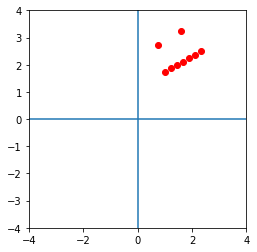

In [27]:
import math
from plotting_matplotlib import plot

A = listlist2mat([[math.sqrt(3)/2, -1/2], [1/2, math.sqrt(3)/2]])
B = listlist2mat([[2,3,1.75,2,2.25,2.5,2.75,3,3.25],[2,2,1,1,1,1,1,1,1]])
AB = A*B

print('A', A)
print('B', B)
print('AB', AB)

rot30 = [[AB[0,c],AB[1,c]] for c in AB.D[1]]
plot(rot30, 4)

### Example 5.11.6
$[3,0,0]=3[1,0,0]+0[1,1,0]+0[1,1,1]$

$[0,2,0]=-2[1,0,0]+2[1,1,0]+0[1,1,1]$

$[0,0,1]=0[1,0,0]-1[1,1,0]+1[1,1,1]$

$\begin{bmatrix} 3 & 0 & 0\\ 0 & 2 & 0 \\ 0 & 0 & 1 \end{bmatrix}=\begin{bmatrix} 1 & 1 & 1\\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} 3 & -2 & 0\\ 0 & 2 & -1 \\ 0 & 0 & 1 \end{bmatrix}$

### Definition 5.11.7 (행렬-행렬 곱셈의 도트곱 정의)
AB의 엔트리 rc는 A의 행 r과 B의 열 c의 도트곱이다.

## 5.111.2 그래프, 결합행렬(Incidence matrix), 계수 경로(Counting path)

### 그래프 
- 비공식적으로 그래프는, 꼭지점(vertex)또는 노드(node)라 불리는 점들과
- 에지(edge)라 고하는 링크들을 가진다.

###  인접행렬(Adjaceny matrix)
- 인접행렬 A는 노드들의 임의의 쌍 i,j에 대해 A[i,j]는 양 끝이 i와 j인 에지들의 개수이다.
- 유향(directed)가 없는 경우 인접행렬은 대칭행렬이다. 즉, 에지의 양 끝이 i,j이면, 그 에지의 양 끝은 또한 j,i라는 것이다.
- 셀프루프(self-loop)가 없다면 대각 원소들은 0이다.

In [28]:
# A graph of Good Will Hunting
#   4
#  / \
# 1--2==3

A = listlist2mat([[0,1,0,1], [1,0,2,1], [0,2,0,0], [1,1,0,0]])
print(A)


       0 1 2 3
     ---------
 0  |  0 1 0 1
 1  |  1 0 2 1
 2  |  0 2 0 0
 3  |  1 1 0 0



### 워크
- 번갈아 나오는 노드들과 에지들의 시퀀즈다 
- $v_0e_0v_1e_1...e_{k-1}v_k$
- n단계 워크는 n개의 에지들로 구성된다.

In [29]:
#     4
#    / \
#   d   e
#  /    \
# 1--a--2--c--3
#        \-b-/

# ex: 3 walk from 3 to 2
# 3c2e4e2

### 워크의 개수 계산하기
- 인접행렬 A는 1단계의 워크의 개수를 내표한다.
- 2단계 워크: i에서 j로의 2단계 워크는 i에서 어떤 노드 k로의 1단계 워크에 이어 k에서 j로의 1단계 워크로 구성된다.
- A의 행 i는 벡터 u이며, u[k]는 i에서 k로의 1단계 워크으 ㅣ개수이고, A의 열 j는 벡터 v이며, v[k]는 k에서 j로의 1단계 워크의 개수이다.
- 2단계 워크=AA
- 3단계 워크: i에서 j로의 3단계 워크는 i에서 어떤 노드 k로의 2단계 워크에 이어 k에서 j로의 1단계 워크로 구성된다.
- 3단계 워크=(AA)A

In [30]:
D = {1,2,3,4}
A = Mat((D,D), {(1,2):1, (1,4):1, (2,1):1, (2,3):2, (2,4):1, (3,2):2, (4,1):1, (4,2):1})
print('2단계 워크:', A*A)
print('3단계 워크:', (A*A)*A)

2단계 워크: 
       1 2 3 4
     ---------
 1  |  2 1 2 1
 2  |  1 6 0 1
 3  |  2 0 4 2
 4  |  1 1 2 2

3단계 워크: 
       1  2  3 4
     -----------
 1  |  2  7  2 3
 2  |  7  2 12 7
 3  |  2 12  0 2
 4  |  3  7  2 2



### 워크의 개수 응용
- 소셜 네트워크를 모델링하는 그래프에서 두 노드의 쌍이 얼마나 밀접하게 결합되어 있는지를 측정하는 하나의 방법으로 사용될 수 있다.

## 5.11.4 행렬-행렬 곱셈과 함수 합성

### Lemma 5.11.8 (행렬-곱셈 Lemma)
$f_{AB}=f_A\circ f_B$

### Example 5.11.9
함수 합설이 교환적이지 않기 때문에 행렬-행렬 곱셈ㅇ이 교환적이지 않다는 사실이 놀랍지 않다.
- $f([x_1,x_2])=[x_1+x_2,x_2]$
- $g([x_1,x_2])=[x_1,x_1+x_2]$
- $f\circ g([x_1,x_2])=f([x_1,x_1+x_2])=[2x_1+x_2,x_1+x_2]$
- $g\circ f([x_1,x_2])=g([x_1+x_2,x_2])=[x_1+x_2,x_1+2x_2]$

In [31]:
A = listlist2mat([[1,1],[0,1]])
B = listlist2mat([[1,0],[1,1]])
print('AB',A*B)
print('BA',B*A)

AB 
       0 1
     -----
 0  |  2 1
 1  |  1 1

BA 
       0 1
     -----
 0  |  1 1
 1  |  1 2



### Example 5.11.10
특정 행렬들의 곱은 곱하는 순서에 상관이 없다.

In [32]:
B = listlist2mat([[1,0,0,0],[2,1,0,0],[0,0,1,0],[0,0,0,1]]) # 행 1의 2배를 행 2에 더한다.
C = listlist2mat([[1,0,0,0],[0,1,0,0],[3,0,1,0],[0,0,0,1]]) # 행 1의 3배를 행 3에 더한다.
D = listlist2mat([[1,0,0,0],[0,1,0,0],[0,0,1,0],[4,0,0,1]]) # 행 1의 4배를 행 4에 더한다.
A = listlist2mat([[1,0,0,0],[2,1,0,0],[3,0,1,0],[4,0,0,1]]) # BCD,DCB,CBD,...

print('A',A)
print('BCD',B*C*D)
print('DCB',D*C*B)

A 
       0 1 2 3
     ---------
 0  |  1 0 0 0
 1  |  2 1 0 0
 2  |  3 0 1 0
 3  |  4 0 0 1

BCD 
       0 1 2 3
     ---------
 0  |  1 0 0 0
 1  |  2 1 0 0
 2  |  3 0 1 0
 3  |  4 0 0 1

DCB 
       0 1 2 3
     ---------
 0  |  1 0 0 0
 1  |  2 1 0 0
 2  |  3 0 1 0
 3  |  4 0 0 1



### Corollary 5.11.11
행렬-행렬 곱셈은 결합적이다.


### Example 5.11.12

In [33]:
A = listlist2mat([[1,0],[1,1]])
B = listlist2mat([[1,1],[0,1]])
C = listlist2mat([[-1,3],[1,2]])

print('A(BC)',A*(B*C))
print('(AB)C',(A*B)*C)

A(BC) 
       0 1
     -----
 0  |  0 5
 1  |  1 7

(AB)C 
       0 1
     -----
 0  |  0 5
 1  |  1 7



### Example 5.11.13
행렬-행렬 곱셈은 결합 법칙이 성립하므로 괄호는 의미가 없으므로 3단계 워크 수 (AA)A는 AAA로 쓸 수 있다.

___
행렬 A를 k번 곱한 것은 다음과 같다.

$AA...A$

이것은 $A^k$로 쓰고 "A의 k 제곱"이라고 한다.

## 5.11.4 행렬-행렬 곱의 전치

### Proposition 5.11.14
행렬 A와 B에 대해 다음이 성립하다.

$(AB)^T=B^TA^T$

___
A는 R x S이고 B는 S x T라고 해보자
- A의 열-라벨 집합은 B의 행-라벨 집합과 일치하므로, 곱 AB는 정의된다.
- 하지만 $A^T$는 S x R행렬이고 B는 T x S행렬이다. 따라서 $A^T$의 열-라벨 집합은 $B^T$의 행-라벨 집합과 일치하지 않으므로 $A^TB^T$는 정의되지 않는다.
- 한편, $B^T$의 열-라벨 집합은 $A^T$의 행-라벨 집합과 일치한다. 따라서 $B^TA^T$는 정의된다.

### Example 5.11.15

In [36]:
A = listlist2mat([[1,2],[3,4]])
B = listlist2mat([[5,0],[1,2]])

print('AB^T', (A*B).transpose())
print('B^T*A^T', B.transpose()*A.transpose())

AB^T 
       0  1
     ------
 0  |  7 19
 1  |  4  8

B^T*A^T 
       0  1
     ------
 0  |  7 19
 1  |  4  8



### Example 5.11.16

In [37]:
print('A^T*B^T', A.transpose()*B.transpose())

A^T*B^T 
        0  1
     -------
 0  |   5  7
 1  |  10 10



## 5.11.5 열벡터와 행벡터

### 열벡터
m x 1행렬은 그 왼쪽에 행렬을 곱할때 벡터처럼 동작하므로 *열벡터*라고 한다. 다음 행렬-행렬 곱을 고려해 보자.

$\begin{bmatrix}  &  & \\  & M &  \\  & &  \end{bmatrix} \begin{bmatrix}  u_1 \\  ...  \\  u_n  \end{bmatrix}$

### 행벡터
1 x m행렬은 그 오른쪽에 행렬 M을 곱하는 것은 벡터-행렬 곱셈과 같이 동작한다.

$\begin{bmatrix}  u_1 &...&u_n\end{bmatrix} \begin{bmatrix}  &  & \\  & M &  \\  & &  \end{bmatrix} $

## 5.11.6 모든 벡터는 열벡터로 해석된다.

- 선형 대수학의 관례에 따르면, 행렬과 벡터가 관련된 것을 표현할 때 모든 벡터는 열벡터로 해석된다.
- 전통적으로 행렬-벡터 곱은 $Mv$로 나타낸다.
- 벡터를 행벡터 대신 열벡터로 해석하는 이유는 행렬-벡터 곱셈이 벡터-행렬 곱셈보다 더 흔하기 때문이다.
- 벡터를 행렬로 해석함으로써 행렬-행렬 곱셈의 결합성을 이용할 수 있다.
- 이제부터는 벡터는 열벡터로 간주하여 행렬-벡터 곱셈에서 *을 사용하지 않을 것이다.

### Example 5.11.17
열벡터 관례에 따르면, Example 5.5.2의 행렬-벡터 곱을 다음과 같아 나타낸다.

$\begin{bmatrix} 1 & 2 & 3\\ 10 & 20 & 30 \end{bmatrix} * [7,0,4]$

$\begin{bmatrix} 1 & 2 & 3\\ 10 & 20 & 30 \end{bmatrix} \begin{bmatrix} 7 \\ 0 \\ 4 \end{bmatrix}$

### Example 5.11.18
열벡터 관례에 따르면, 벡터-행렬 곱은 아래와 같이 나타낸다.

$[3, 4] * \begin{bmatrix} 1 & 2 & 3\\ 10 & 20 & 30 \end{bmatrix}$

$ \begin{bmatrix} 3 \\ 4 \end{bmatrix}^T \begin{bmatrix} 1 & 2 & 3\\ 10 & 20 & 30 \end{bmatrix}$

## 5.11.7 선형결합의 선형결합 - 다시보기

- 선형결합의 선형결합은 또한 선형결합이 된다는 사실은 행렬-행렬 곱셈의 결합성의 결과입다.

$\begin{bmatrix} x \\ y \\ z \end{bmatrix} =(\begin{bmatrix} 1 & 1 & 1\\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} 3 & 0 & 0\\ 0 & 2 & 0 \\ 0 & 0 & 1 \end{bmatrix}) \begin{bmatrix} x/3 \\ y/2 \\ z \end{bmatrix}$

결합성에 의해

$\begin{bmatrix} x \\ y \\ z \end{bmatrix} =\begin{bmatrix} 1 & 1 & 1\\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{bmatrix} (\begin{bmatrix} 3 & 0 & 0\\ 0 & 2 & 0 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x/3 \\ y/2 \\ z \end{bmatrix})$

간단가헤 바꾸면,

$\begin{bmatrix} x \\ y \\ z \end{bmatrix} =\begin{bmatrix} 1 & 1 & 1\\ 0 & 1 & 1 \\ 0 & 0 & 1 \end{bmatrix} \begin{bmatrix} x-y \\ y-z \\ z \end{bmatrix}$

# 5.12 내적(Inner product)과 외적(Outer product)

## 5.12.1 내적

u와 v는 두 개의 D-벡터라고 하자. "행렬-행렬" $u^Tv$를 고려해 보자. 행렬-행렬 도트곱 정의에 의하면 이 곱은 값이 $u\cdot v$인 하난의 엔트리로 구성된다.

이러한 이유로 인해, u와 v의 도트곱은 흔히 $u^Tv$로 나타내고, 종종 내적이라고 한다. 하지만 "내적"이란 용어는 또 다른 의미를 가지고 있다.

### Example 5.12.1
$\begin{bmatrix} 1 & 2 & 3 \end{bmatrix}\begin{bmatrix} 3\\ 2 \\ 1 \end{bmatrix}=\begin{bmatrix} 10\end{bmatrix}$

## 5.12.2 외적

$uv^T$를 고려해 보자. u의 정의역의 각 원소 s와 v인 정의역의 각 원소 t에 대해, $uv^T$의 s,t원소는 u[s]v[t]이고 이러한 곱을 외적이라 한다.

### Example 5.12.2
$\begin{bmatrix} u_1 \\ u_2 \\ u_3 \end{bmatrix}\begin{bmatrix} v_1 & v_2 & v_3 &v_4 \end{bmatrix}=\begin{bmatrix} u_1v_1 & u_1v_2 & u_1v_3 &u_1v_4 \\ u_2v_1 & u_2v_2 & u_2v_3 &u_2v_4 \\ u_3v_1 & u_3v_2 & u_3v_3 &u_3v_4\end{bmatrix}$